# House Price Prediction

Importing necessaries classes and libraries. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

First we load our dataset.

In [ ]:
housing = pd.read_csv("data.csv") 

## Data Analysis

Now we use 'head' to get a glimpse of our dataset.

1) Accessing the first five rows

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


2)Seeing number of entries and checking for any missing data. If any data is missing we'll have to deal with it later. 

Here some entries in attribute RM are missing. 

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


3) Column 'CHAS' is a categorical data.We now check for count of each category. 

In [ ]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285952,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705089,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


4) describe() generates various descriptive statistics. 

1. count: Shows count of non-null values in that attribute of non null values
2. Then we the Mean, Standard Deviation, Min val, 25th,50th,75th percentile val and Max val. 
3. 75th val: 75% of values of that attribute are less than the shown value. 


## DATA VISUALIZATION

We now visualize our data through histograms. 



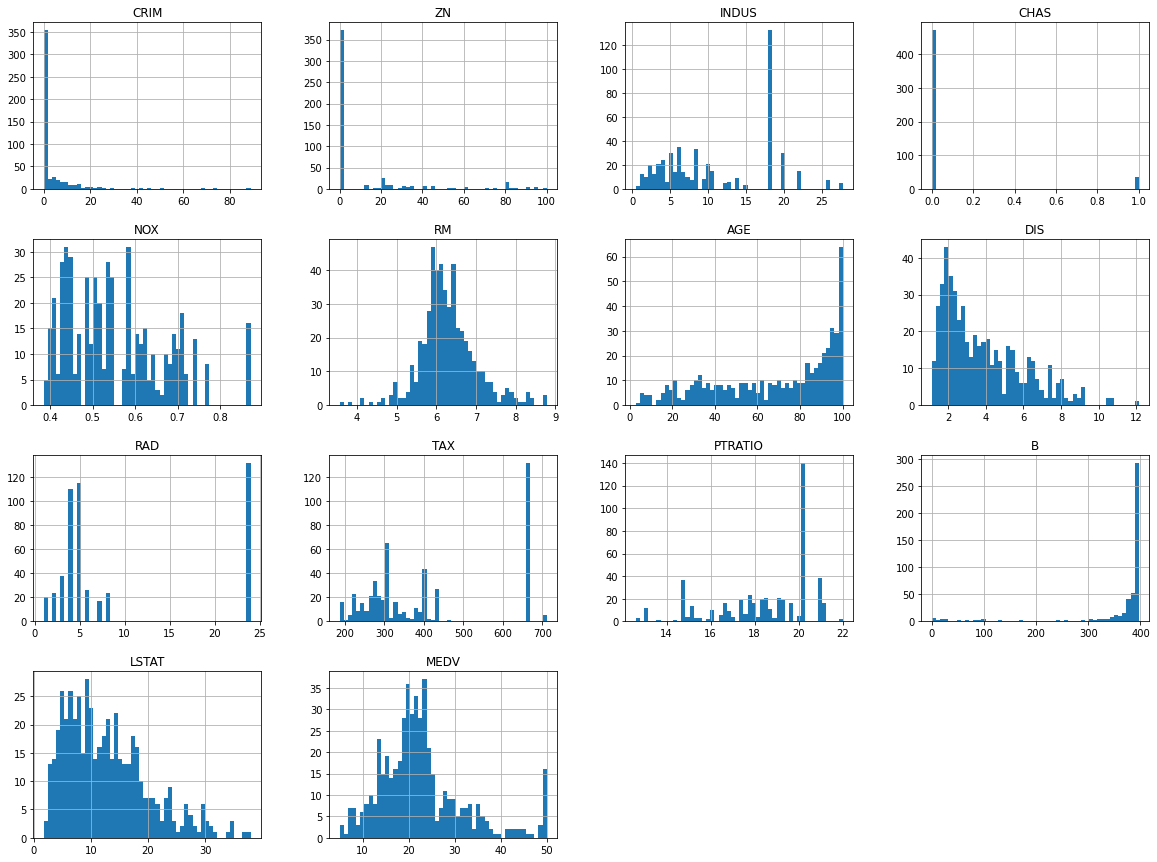

In [ ]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

## DATA PREPROCESSING

## Train-Test Splitting

Now we split our dataset into training data and testing data, using StratifiedShuffleSplit.

StratifiedShuffleSplit: This yields train/test indices to split data in train/test sets.                                   
.split() module: yields training set indices and test set indices for that iteration.  

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit         
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)


for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [ ]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [ ]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [ ]:
housing= strat_train_set.copy()        #now housing is our training set
housing.shape

(404, 14)

## Looking for correlations

In [ ]:
corr_matrix= housing.corr()  
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.258806,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.293352,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.384772,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.099693,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.301632,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.258806,0.293352,-0.384772,0.099693,-0.301632,1.000000,-0.243046,0.209816,-0.201604,-0.285165,-0.331169,0.121380,-0.601840,0.679497
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.243046,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.209816,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.201604,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.285165,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


Checking Pearson Correlation Coefficient of various attributes relative to MEDV attribute.

In [ ]:
corr_matrix['MEDV'].sort_values(ascending=False)           

MEDV       1.000000
RM         0.679497
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

From this table looking at the values we can deduct that:                         
For RM attribute, PCC= 0.69 which is a high PCC; which means as MEDV increases RM increases.  



In [ ]:
corr_matrix['CHAS'].sort_values(ascending=False)           

CHAS       1.000000
MEDV       0.205066
RM         0.099693
NOX        0.077490
AGE        0.058388
B          0.048275
INDUS      0.043686
RAD       -0.023005
ZN        -0.023536
TAX       -0.048802
CRIM      -0.061482
LSTAT     -0.077592
DIS       -0.088081
PTRATIO   -0.132682
Name: CHAS, dtype: float64

## Data visualization to see correlations

    Plotting Scatter Plots between ["RM","ZN","MEDV","LSTAT"], to visualize the correlation between them. 

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

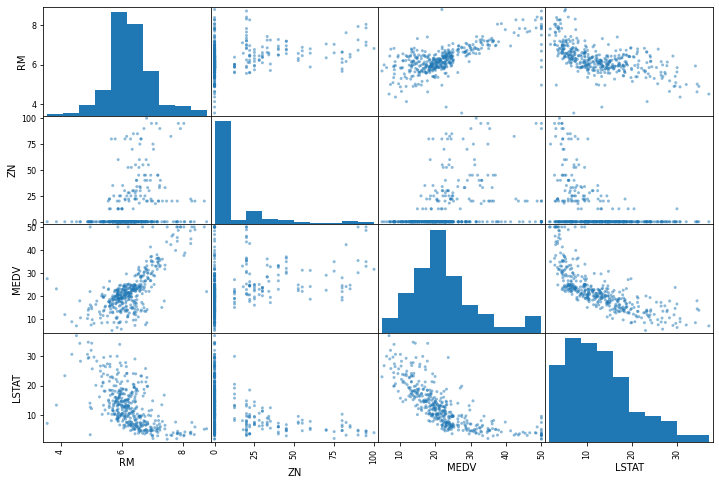

In [ ]:
attributes= ["RM","ZN","MEDV","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

Deductions from plots:

1) Plots of 2 same features (ex: ZN v/s ZN) is not a straight line but histogram so that we can draw insights from it.    
   Hence diagonal has histograms                               
   Ex: ZN takes value 0 for max number of times (almost 100 times)                                      
2) LSTAT shows negative correlation with MEDV. 
3) RM shows positive correlation with MEDV.  

To get a better view of the scatter plot: 

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

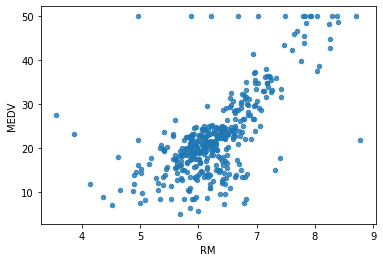

In [ ]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

Deductions from scatter plot: 

1) We can remove outlying points so that our model learns on better consistent dataset and gives more accurate predictions. 

2) The horizontal points on above indicate that no house is above 50 even as RM low or high; the reason for this may be            investigated. 
 




## Trying out attribute combinations

Sometimes we may combine two or more attributes to create a new one, to make it more suitable for machine learning and remove outlying data points.                              
Ex: We have two attributes RM and TAX; we may create a new attribute called tax per room. 

In [ ]:
housing["TAXRM"]= housing['TAX']/housing['RM']

In [ ]:
corr_matrix= housing.corr()
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV       1.000000
RM         0.679497
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527152
LSTAT     -0.740494
Name: MEDV, dtype: float64

Clearly there's a negative correlation between MEDV and TAXRM which is strong deduction and may be useful.  

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

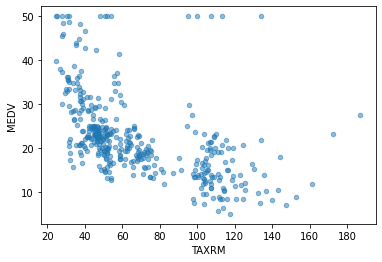

In [ ]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.5)

Splitting features and labels so that we can pass them to models sepearately

In [ ]:
housing= strat_train_set.drop("MEDV",axis=1)
housing_labels= strat_train_set["MEDV"].copy()

## Missing attributes

We replace NULL values by median, mean or some other suitable strategy.

In [ ]:
median= housing["RM"].median()
median

6.216

In [ ]:
housing["RM"].fillna(median)
housing.shape



(404, 13)

Original dataframe remains unchanged right now, as evident by count of RM. Count of RM changes after imputing. 

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281504,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716182,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


Now that we've the median from training set we'll have to fit it in test set as well because even that may have missing values.
Also suppose the features which are given input have again missing RM values, so we need to keep this median safe to use it instead of null values.

Automating this would be a good practise, for that we use SimpleImputer class from sklearn.

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

Now we fit our imputer to our data

In [ ]:
imputer.fit(housing)

SimpleImputer(strategy='median')

 Now we do this for all columns

In [ ]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

Using transform method we now impute null values in all columns with median of that respective column. 

In [ ]:
X= imputer.transform(housing)

In [ ]:
housing_tr= pd.DataFrame(X,columns= housing.columns)
housing_tr.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280693,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711762,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


 RM count is now 404.
 

## Creating Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline= Pipeline([('imputer',SimpleImputer(strategy='median')), ('std_scaler',StandardScaler())])

In [ ]:
housing_num_tr= my_pipeline.fit_transform(housing) 

In [ ]:
housing_num_tr.shape


(404, 13)

## Selecting a desired model for Real Estates

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model= LinearRegression()
model= DecisionTreeRegressor()
#model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)


DecisionTreeRegressor()

We seperate out first 5 rows to test our model on it and make predictions.

In [ ]:
some_data= housing.iloc[:5]
some_labels= housing_labels.iloc[:5]

In [ ]:
prepared_data= my_pipeline.transform(some_data)

We now predict on our prepared data.
It gives array of predicted labels. 


In [ ]:
model.predict(prepared_data)



array([21.9, 24.5, 16.7, 23.1, 23. ])

In [ ]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [ ]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating model

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions= model.predict(housing_num_tr)
mse= mean_squared_error(housing_labels,housing_predictions)
rmse= np.sqrt(mse)


In [ ]:
mse  

0.0

In [ ]:
rmse

0.0

## To overcome overfitting we use Cross Validation 

In [ ]:
from sklearn.model_selection import cross_val_score

scores= cross_val_score(model,housing_num_tr,housing_labels, scoring="neg_mean_squared_error",cv=10)

rmse_scores = np.sqrt(-scores)        

rmse_scores
scores

array([-17.4397561 , -29.4595122 , -29.55878049, -14.9695122 ,
       -16.97875   , -10.595     , -20.3465    , -15.54825   ,
       -11.0795    , -15.6465    ])

In [ ]:
def printScores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [ ]:
printScores(rmse_scores)

Scores: [4.1760934  5.42766176 5.43679874 3.86904539 4.12052788 3.25499616
 4.51070948 3.94312693 3.32858829 3.9555657 ]
Mean: 4.20231137208669
Standard Deviation: 0.7090735008388457


## Saving the model

In [ ]:
#Sklearn joblib: enables us to save model
from joblib import dump,load
dump(model,'RealEstate.joblib')

['RealEstate.joblib']

## Testing model on test data


In [ ]:
X_test= strat_test_set.drop("MEDV",axis=1)
Y_test= strat_test_set["MEDV"].copy()

X_test_prepared=my_pipeline.transform(X_test)
final_predictions= model.predict(X_test_prepared)

final_mse= mean_squared_error(Y_test,final_predictions)
final_rmse= np.sqrt(final_mse)


In [ ]:
final_rmse

4.200303443753539

NOTE:
1) Our dataset is very small
2) We did not fine tune our model


In [ ]:
prepared_data #for model usage

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.24292835, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.49840563, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28599305,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13406882, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04403964, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])